In [2]:
import csv
import pandas as pd
import numpy as np
file = pd.read_csv("test1_true.csv")
file.head()


,Time,RPM,MPH,THROTTLE_POS,AX,AY,AZ,GX,GY,GZ,Latitude,Longitude
0,1649896450,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1649896451,1170.00,6.213712,15.686275,1.139640,-1.379060,10.194511,-0.062885,-0.156413,0.358392,30.597762,-96.338408
2,1649896452,1442.00,7.456454,17.254902,2.236184,-1.446098,9.404424,0.095394,-0.102855,0.382907,30.597792,-96.338445
3,1649896453,1447.50,8.699197,21.176471,3.083732,-1.953669,10.141838,0.072478,-0.069014,0.366119,30.597835,-96.338487
4,1649896454,1523.75,11.806053,21.568627,2.279280,-2.154781,9.279926,0.013323,-0.078873,0.212637,30.597880,-96.338480


In [3]:
trip_time, col_count = file.shape
diff_list = []
wreck_points = 0
sharp_steer = 0
for x, y in zip(file['MPH'][0::], file['MPH'][1::]):
    if (abs(y-x) > 2):
        wreck_points += 1
    diff_list.append(y-x)

# printing difference list
count_length = trip_time - 1
percent_wreck = (wreck_points/count_length)*100
#print ("difference list: ", str(diff_list))
print("Amount of total trip that identified major difference in speeds per timestamp:",percent_wreck)




Amount of total trip that identified major difference in speeds per timestamp: 21.75141242937853


In [4]:
## average speed per cluster of 5
sum_list = []
for i in range(0,count_length, 5):
   sum_list.append(sum(file['MPH'][i:i+5])/5)
print(sum_list[0:10])

## maximum speed observed 
print("Maximum Speed Observed:",max(file['MPH']))
    

[6.835083114610674, 15.534279805933352, 8.450648214427742, 12.42742384474668, 24.730573451045895, 30.198639942734438, 32.43557623478883, 32.43557623478883, 25.35194464328323, 6.586534637715741]
Maximum Speed Observed: 48.46695299451206


In [47]:
## identify sudden brakes 
#according to research, deceleration of < 15 fps is considered safe
jerk_break_count = 0
for x, y in zip(file['MPH'][0::], file['MPH'][1::]):
    x = x * 1.467
    y = y * 1.467 
    if ((y-x) < 0 and abs(y-x) > 7): #use 7 bc there was 0 occurence of >15
        jerk_break_count +=1
print("Percent of sudden brake instances indentified:",(jerk_break_count/count_length)*100)

Percent of sudden brake instances indentified: 1.977401129943503


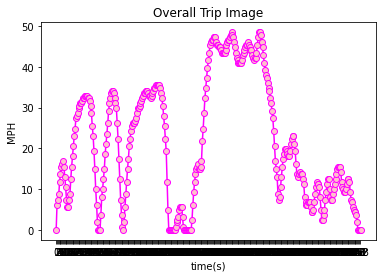

In [53]:
import matplotlib.pyplot as plt
import random

data = file['MPH']  #create a list of 10 random numbers

plt.plot(data, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,count_length, 1)) #set the tick frequency on x-axis

plt.ylabel('MPH') #set the label for y axis
plt.xlabel('time(s)') #set the label for x-axis
plt.title("Overall Trip Image") #set the title of the graph
plt.show() #display the graph

In [11]:
## is the driver displaying stable speeding?
unstable_count = 0
for x, y in zip(file['MPH'][0::], file['MPH'][1::]):
    if (abs(y-x)>1.5):
        unstable_count +=1
print("Percent of trip with inconsistent speeding: ",round((unstable_count/count_length)*100,2))


Percent of trip with inconsistent speeding:  33.62


In [5]:
## Number of stops made during trips
stop_count = 0
for x, y in zip(file['MPH'][0::], file['MPH'][1::]):
    if (y == 0 and abs(y-x) > 0.6):
        stop_count +=1
print("Number of stops made during this trip: ", round(stop_count,2))

Number of stops made during this trip:  5


In [70]:
## add traffic condition and speed_limit from GMAPsAPI

In [ ]:
##final report here
## how do we wanna do this?